# Multi-Layer Perceptron (MLP) Implementation - Lab Report

## **Objective**
This laboratory report demonstrates the implementation and evaluation of a Multi-Layer Perceptron (MLP) neural network for supervised learning tasks, with specific focus on non-linearly separable data classification.

## **Experiment Parameters**
- **Dataset**: Synthetic data using `make_blobs` function
- **Number of Centers**: 4
- **Standard Deviation**: 1.09
- **Random Seed**: 127
- **Sample Size**: 300 data points

## **Network Architecture**
- **Input Layer**: 2 neurons (for 2D features)
- **Hidden Layer**: 5 neurons with sigmoid activation
- **Output Layer**: 1 neuron with sigmoid activation
- **Learning Rate**: 0.1
- **Training Epochs**: 1000

## **Methodology**
1. **Data Generation**: Create synthetic datasets for both supervised and unsupervised learning
2. **Baseline Comparison**: Implement K-Nearest Neighbors for performance comparison
3. **MLP Implementation**: Build and train a custom multi-layer perceptron
4. **Performance Evaluation**: Analyze accuracy and decision boundaries
5. **Visualization**: Plot data distributions and decision boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

np.random.seed(150)

def generate_and_plot_data(n_samples=300):
    """
    Generates synthetic data for both supervised and unsupervised tasks
    and plots it to show the initial state.

    Args:
        n_samples (int): The total number of data points to generate.

    Returns:
        tuple: A tuple containing supervised and unsupervised data.
    """
    print("--- Exploratory Data Analysis (EDA) ---")
    print("Generating and plotting supervised and unsupervised data.")

    X_sup, y_sup = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

    X_un, y_un = make_blobs(n_samples=n_samples, centers=4, cluster_std=1.09, random_state=127)

    # Plotting Supervised Data
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X_sup[:, 0], X_sup[:, 1], c=y_sup, cmap='coolwarm', edgecolor='k', s=50)
    plt.title('Supervised Data: Non-Linearly Separable Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting Unsupervised Data (without labels)
    plt.subplot(1, 2, 2)
    plt.scatter(X_un[:, 0], X_un[:, 1], c='gray', edgecolor='k', s=50)
    plt.title('Unsupervised Data: No Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

    return X_sup, y_sup, X_un

def run_supervised_learning(X, y):
    """
    Demonstrates a supervised learning task using K-Nearest Neighbors.

    Args:
        X (np.ndarray): The feature data.
        y (np.ndarray): The labels for the data.
    """
    print("\n--- Supervised Learning (K-NN Classifier) ---")
    print("Model learns to predict a label based on labeled training data.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Plot the decision boundary for KNN
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, zorder=2)
    plt.title('K-Nearest Neighbors Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.show()

    # Evaluate the model
    accuracy = knn.score(X_test, y_test)
    print(f"Model trained on {len(X_train)} samples.")
    print(f"Accuracy on test data: {accuracy:.2f}")


class MultiLayerPerceptron:
    def __init__(self, num_inputs, num_hidden, num_outputs, learning_rate=0.1):
        self.num_hidden = num_hidden
        self.learning_rate = learning_rate

        # Initialize weights and biases for the hidden layer
        self.weights_hidden = np.random.uniform(-1, 1, (num_inputs, num_hidden))
        self.bias_hidden = np.zeros(num_hidden)

        # Initialize weights and biases for the output layer
        self.weights_output = np.random.uniform(-1, 1, (num_hidden, num_outputs))
        self.bias_output = np.zeros(num_outputs)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X_train, y_train, epochs=1000):
        for epoch in range(epochs):
            
            # Forward propagation
            hidden_layer_input = np.dot(X_train, self.weights_hidden) + self.bias_hidden
            hidden_layer_output = self._sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
            predicted_output = self._sigmoid(output_layer_input)

            # Backpropagation
            error_output = y_train.reshape(-1, 1) - predicted_output
            d_predicted_output = error_output * self._sigmoid_derivative(predicted_output)

            error_hidden = np.dot(d_predicted_output, self.weights_output.T)
            d_hidden_layer = error_hidden * self._sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            self.weights_output += np.dot(hidden_layer_output.T, d_predicted_output) * self.learning_rate
            self.bias_output += np.sum(d_predicted_output, axis=0) * self.learning_rate
            self.weights_hidden += np.dot(X_train.T, d_hidden_layer) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0) * self.learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_layer_output = self._sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
        predicted_output = self._sigmoid(output_layer_input)

        return np.round(predicted_output)

def run_mlp_learning(X, y):
    """
    Demonstrates a supervised learning task using a multi-layer perceptron.

    Args:
        X (np.ndarray): The feature data.
        y (np.ndarray): The labels for the data.
    """
    print("\n--- Supervised Learning (Multi-Layer Perceptron) ---")
    print("Model learns a non-linear decision boundary to classify the data.")

    # Create and train the multi-layer perceptron
    mlp = MultiLayerPerceptron(num_inputs=2, num_hidden=5, num_outputs=1, learning_rate=0.1)
    y_reshaped = y.reshape(-1, 1)
    mlp.train(X, y_reshaped)

    # Plot the data and the decision boundary
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    plt.title('Multi-Layer Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z_raw = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z_raw.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.show()

    # Evaluate the model
    predictions = mlp.predict(X)
    accuracy = np.mean(predictions.flatten() == y)
    print(f"Accuracy of MLP on the data: {accuracy:.2f}")
    return mlp

--- Exploratory Data Analysis (EDA) ---
Generating and plotting supervised and unsupervised data.


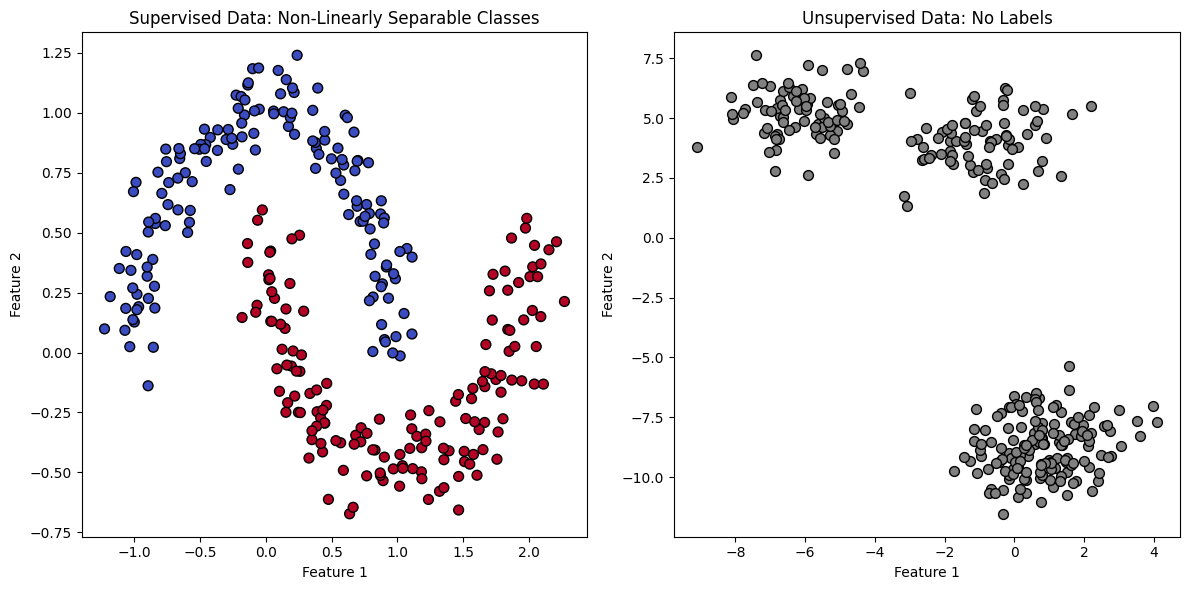

In [2]:
# Generate and visualize the datasets
X_supervised, y_supervised, X_unsupervised = generate_and_plot_data()


--- Supervised Learning (K-NN Classifier) ---
Model learns to predict a label based on labeled training data.


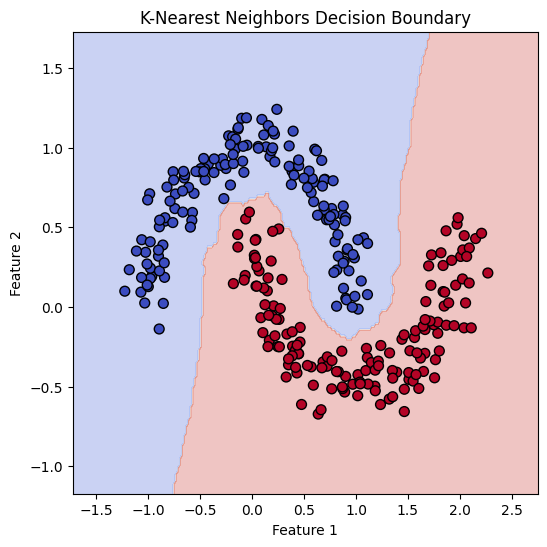

Model trained on 210 samples.
Accuracy on test data: 1.00


In [3]:
# Run supervised learning using K-NN for baseline comparison
run_supervised_learning(X_supervised, y_supervised)


--- Supervised Learning (Multi-Layer Perceptron) ---
Model learns a non-linear decision boundary to classify the data.


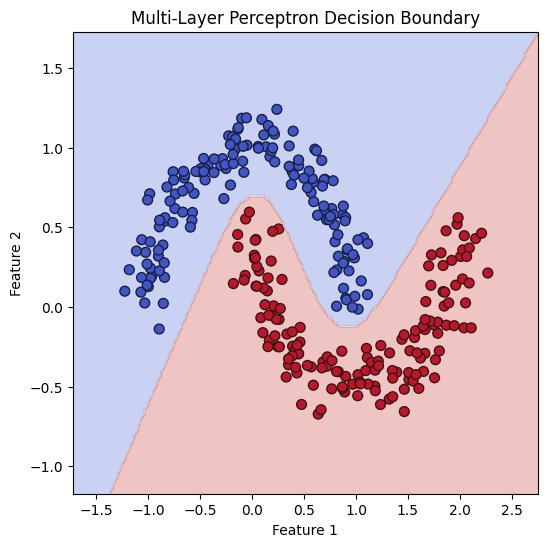

Accuracy of MLP on the data: 1.00


In [4]:
# Run MLP learning on the supervised data
mlp_model = run_mlp_learning(X_supervised, y_supervised)


--- Unsupervised Learning (K-Means Clustering) ---
Model discovers hidden patterns without labeled data.


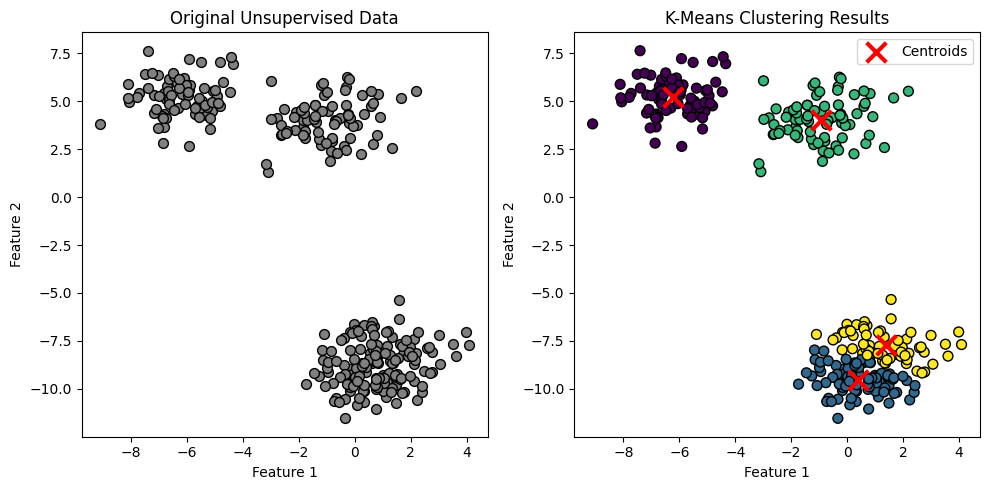

Number of clusters found: 4
Cluster centers:
  Cluster 1: (-6.21, 5.24)
  Cluster 2: (0.38, -9.51)
  Cluster 3: (-0.95, 4.02)
  Cluster 4: (1.39, -7.71)


In [5]:
def run_unsupervised_learning(X_un):
    """
    Demonstrates an unsupervised learning task using K-Means clustering.

    Args:
        X_un (np.ndarray): The unsupervised feature data.
    """
    print("\n--- Unsupervised Learning (K-Means Clustering) ---")
    print("Model discovers hidden patterns without labeled data.")

    # Create and train the K-Means clustering model
    kmeans = KMeans(n_clusters=4, random_state=127, n_init=10)
    cluster_labels = kmeans.fit_predict(X_un)

    # Plot the clustering results
    plt.figure(figsize=(10, 5))

    # Original unlabeled data
    plt.subplot(1, 2, 1)
    plt.scatter(X_un[:, 0], X_un[:, 1], c='gray', edgecolor='k', s=50)
    plt.title('Original Unsupervised Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # K-Means clustering results
    plt.subplot(1, 2, 2)
    plt.scatter(X_un[:, 0], X_un[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Number of clusters found: {len(np.unique(cluster_labels))}")
    print(f"Cluster centers:")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Cluster {i+1}: ({center[0]:.2f}, {center[1]:.2f})")

# Run unsupervised learning on the unlabeled data
run_unsupervised_learning(X_unsupervised)